In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_excel("datasets\AdventureWorks.xlsx")

In [4]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


Recebe a quantidade de linhas e colunas

In [5]:
df.shape

(904, 16)

Informa os tipos de dados contido em cada coluna

In [6]:
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [7]:
#Qual foi a receita total?
df["Valor Venda"].sum()

5984606.1426

In [8]:
#Qual o custo total?
df['custo'] = df['Custo Unitário'].mul(df["Quantidade"])

In [9]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [10]:
round(df["custo"].sum(), 2)

2486783.05

In [11]:
#Agora que temos a receita e o custo podemos achar o valor do lucro
df["lucro"] = df["Valor Venda"] - df["custo"]

In [12]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [13]:
# total do luvro
round(df["lucro"].sum(), 2)

3497823.09

In [14]:
# Calculando tempo de entrega do produto
df["tempo_de_envio"] = df["Data Envio"] - df["Data Venda"]

In [15]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_de_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [16]:
df["tempo_de_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

Dessa maneira somente os dias são retornados em formato de int

In [17]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_de_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [18]:
df.groupby("Marca")["tempo_de_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: tempo_de_envio, dtype: float64

Verificando a média de tempo de envio de cada marca

In [19]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
tempo_de_envio    0
dtype: int64

Verificando se existem dados faltantes na base

In [24]:
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

Fazendo um agrupamento a partir da data e da marca para identificar o lucro em cada ano

In [23]:
pd.options.display.float_format = '{:20,.2f}'.format

Configuração que faz com que os números apareçam de manira original e não em notação científica

In [25]:
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


Armazenando as informações em uma variavel e resetando o index para que apareça em formato colunar

In [26]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

ascending=False, faz com que a organização seja feita do maior para o menor

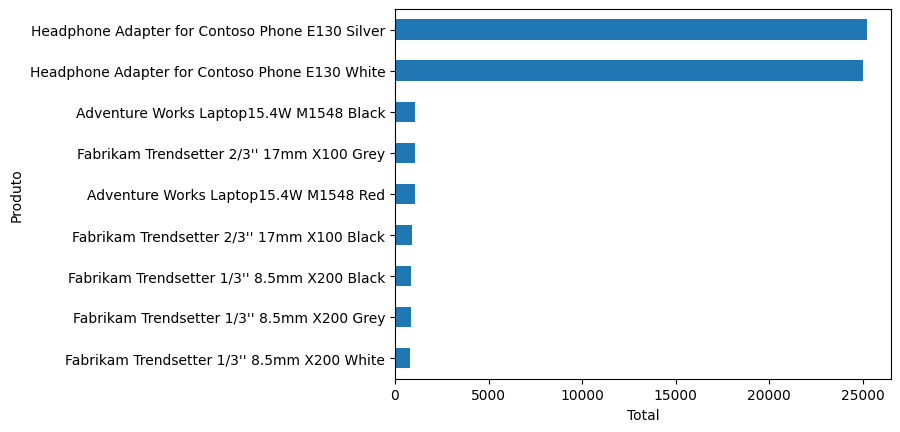

In [27]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh("Total de Produtos Vendidos ")
plt.xlabel("Total")
plt.ylabel("Produto");

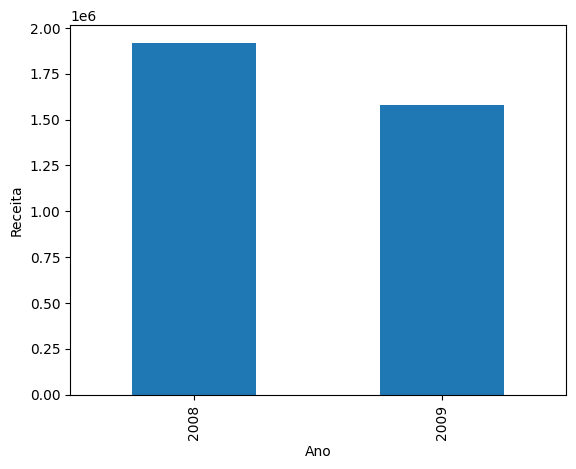

In [29]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar('Lucro por ano')
plt.xlabel('Ano')
plt.ylabel('Receita');

In [30]:
df_2009 = df[df["Data Venda"].dt.year == 2009]

Filtrando somente os dados em que as vendas foram realizadas em 2009

In [31]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_de_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


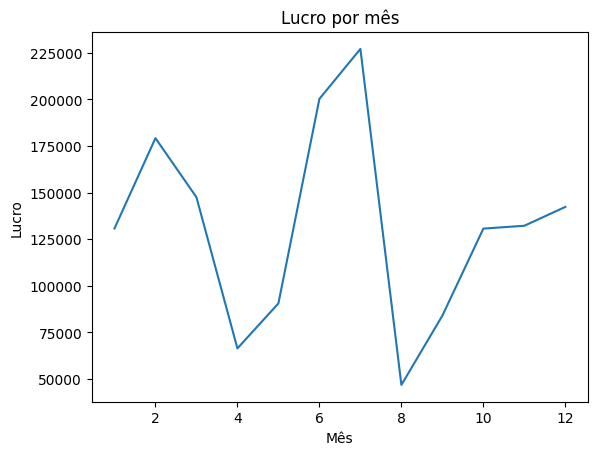

In [32]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro por mês")
plt.xlabel('Mês')
plt.ylabel('Lucro');

Filtrando o lucro por mês do ano de 2009

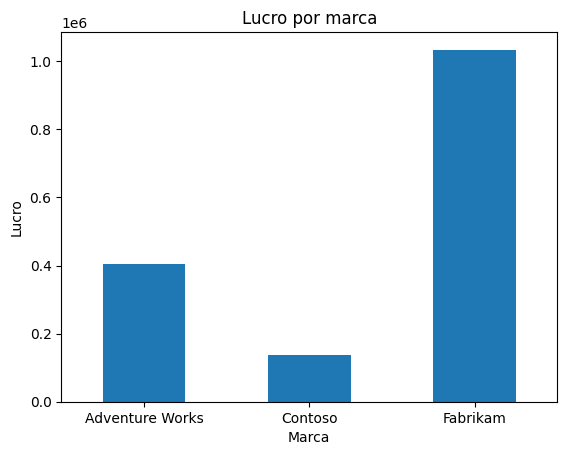

In [36]:
df_2009.groupby("Marca")['lucro'].sum().plot.bar(title="Lucro por marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal'); # Posiciona os elementos do eixo X de forma Horizontal

In [44]:
lucros_mes_marcas = df_2009.groupby([df_2009["Data Venda"].dt.month, 'Marca'])["lucro"].sum().reset_index()


Pegando o lucro por mês de cada marca no ano de 2009

In [45]:
df["tempo_de_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: tempo_de_envio, dtype: float64

Traz descrições detelhadas sobre uma coluna

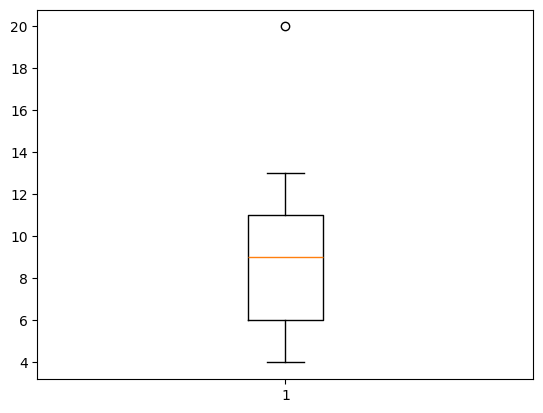

In [46]:
plt.boxplot(df["tempo_de_envio"]);

Nos mostra de maneira grafica as informações de uma tabela

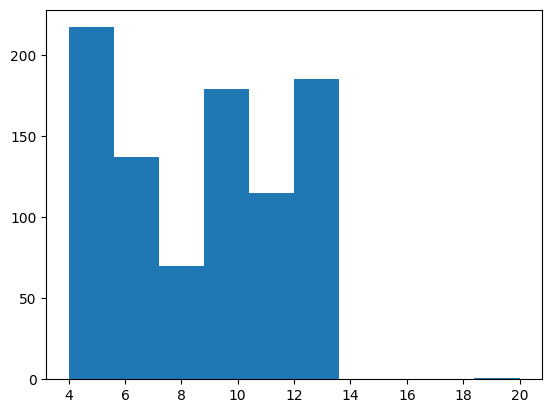

In [47]:
plt.hist(df["tempo_de_envio"]);

In [50]:
df[df["tempo_de_envio"] >=11]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_de_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
9,2008-10-16,2008-10-27,307,384,19107,200810163CS646,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
10,2008-10-21,2008-11-01,307,384,19107,200810213CS646,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,2008-11-22,2008-12-05,307,1155,19109,200811224CS655,324.69,980.00,6,882.00,"4,998.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","3,049.86",13
896,2009-03-04,2009-03-15,307,1155,19117,200903044CS706,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","2,755.86",11
898,2009-06-25,2009-07-06,307,1155,19127,200906254CS717,324.69,980.00,6,588.00,"5,292.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","3,343.86",11
899,2008-03-22,2008-04-04,306,1226,19049,200803224CS555,330.99,999.00,6,419.58,"5,574.42",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,985.94","3,588.48",13
